<a href="https://colab.research.google.com/github/krishnamishra2610/Deep-Learning/blob/main/Digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
!pip install keras-tuner

     |████████████████████████████████| 97 kB 3.8 MB/s 


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

## Scaling

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
##reshape

X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [26]:
## defining the function to build model

def build_model(hp):
  model = keras.Sequential([
                            #1st conv layer
                            keras.layers.Conv2D(
                                filters = hp.Int("conv1_filter",min_value=32,max_value=128,step=16),
                                 kernel_size = hp.Choice("conv1_kernal",values=[2,4,8]),
                                 activation="relu",
                                 input_shape=(28,28,1)
                                 ),
                            keras.layers.MaxPool2D(
                                pool_size = 2
                            ),

                            #2nd conv layer
                                  keras.layers.Conv2D(
                                filters = hp.Int("conv2_filter",min_value=32,max_value=128,step=16),
                                 kernel_size = hp.Choice("conv2_kernal",values=[2,4,8]),
                                 activation="relu",
                                 ),
                            keras.layers.MaxPool2D(
                                pool_size = 2
                            ),

                            #fully connected layer
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int("dense_unit",min_value=32,max_value=1024,step=32),
                                activation = 'relu'
                            ),

                            #output layer
                            keras.layers.Dense(10,activation="softmax")

  ]) 
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",values=[1e-2,1e-3,1e-4])),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [27]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [28]:
tuner_search = RandomSearch(build_model,objective="accuracy",max_trials=3,directory="output2",project_name="digit_recognization")

INFO:tensorflow:Reloading Oracle from existing project output2/digit_recognization/oracle.json
INFO:tensorflow:Reloading Tuner from output2/digit_recognization/tuner0.json


In [29]:
tuner_search.search(X_train,y_train,epochs=2)

Trial 1 Complete [00h 00m 25s]
accuracy: 0.9750166535377502

Best accuracy So Far: 0.9750166535377502
Total elapsed time: 00h 00m 25s
INFO:tensorflow:Oracle triggered exit


In [30]:
model = tuner_search.get_best_models(1)[0]

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 112)       7280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 112)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         229504    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [32]:
model.fit(X_train,y_train,epochs=20,validation_split=0.1,initial_epoch=2)

Epoch 3/20
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 4/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0411 - val_accuracy: 0.9880
Epoch 5/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0440 - val_accuracy: 0.9862
Epoch 6/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0380 - val_accuracy: 0.9888
Epoch 7/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0322 - val_accuracy: 0.9910
Epoch 8/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0344 - val_accuracy: 0.9915
Epoch 9/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0362 - val_ac

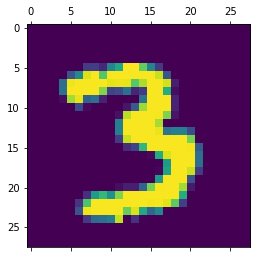

In [55]:
plt.matshow(X_test[[500]].reshape(28,28))

In [54]:
model.predict(X_test[[500]])

array([[2.7288606e-21, 7.7269251e-17, 2.7905027e-16, 1.0000000e+00,
        2.5527122e-23, 5.6562730e-15, 9.4842508e-25, 1.0164997e-15,
        1.3879025e-14, 2.6229840e-13]], dtype=float32)

In [53]:
numpy.argmax(model.predict(X_test[[500]]))

3

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred_label = [numpy.argmax(i) for i in y_pred]

In [52]:
tf.math.confusion_matrix(y_test,y_pred_label)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    2,    0,    0,    0,    0,    1,    2,    1,    0],
       [   0, 1131,    0,    1,    0,    1,    1,    1,    0,    0],
       [   0,    0, 1020,    0,    1,    0,    0,   10,    1,    0],
       [   0,    0,    1, 1002,    0,    3,    0,    2,    2,    0],
       [   0,    0,    0,    0,  972,    0,    2,    1,    1,    6],
       [   2,    0,    0,    4,    0,  882,    1,    1,    2,    0],
       [   2,    2,    0,    0,    1,    3,  947,    0,    3,    0],
       [   0,    2,    2,    0,    0,    0,    0, 1023,    1,    0],
       [   1,    0,    0,    0,    0,    0,    1,    2,  968,    2],
       [   0,    0,    0,    0,    3,    1,    1,    3,    1, 1000]],
      dtype=int32)>

In [63]:
from PIL import Image
from matplotlib import cm

In [83]:
im = Image.fromarray(X_test[[500]].reshape(28,28)*255)

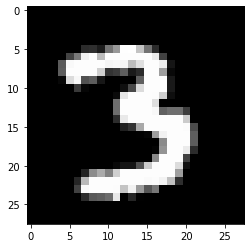

In [84]:
plt.imshow(im)